In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:23:39.222 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:23:39.223 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:23:39.223 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:23:39.223 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:23:39.275 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:23:39.634 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:23:39.638 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:23:39.639 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:23:39.639 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:23:39.651 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.09 s


# 绘制组合窗口

使用 create_figure 函数快速创建查看证券K线信息的常见组合窗口
  

In [2]:
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。
    
    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

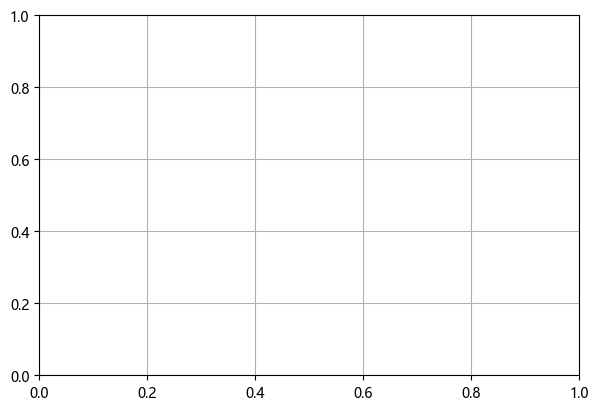

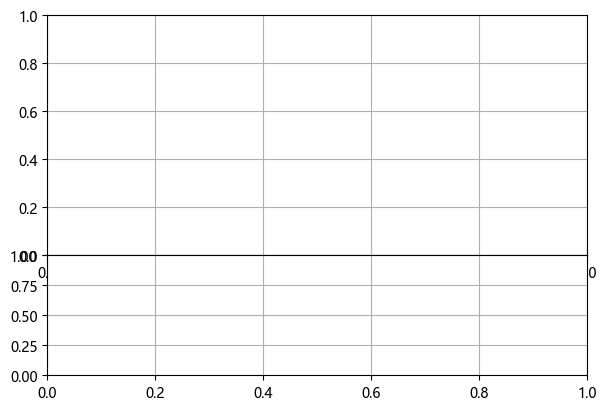

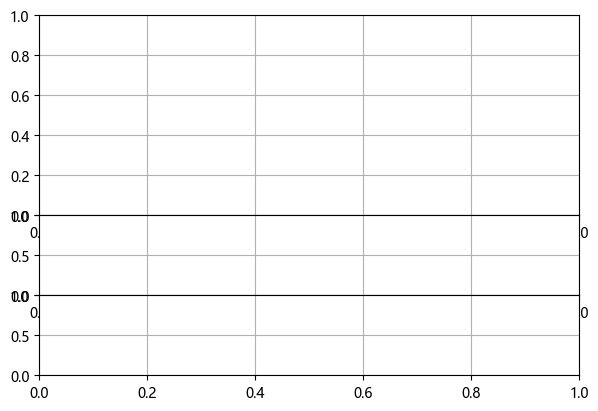

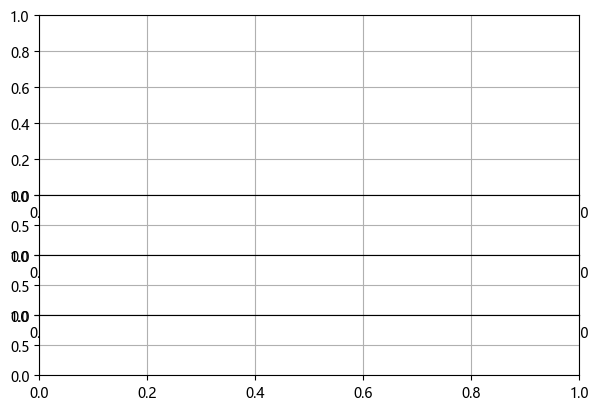

In [3]:
#不同坐标轴数量，其显示窗口布局
create_figure(figsize=(6,4))
create_figure(2, figsize=(6,4))
create_figure(3, figsize=(6,4))
create_figure(4, figsize=(6,4))

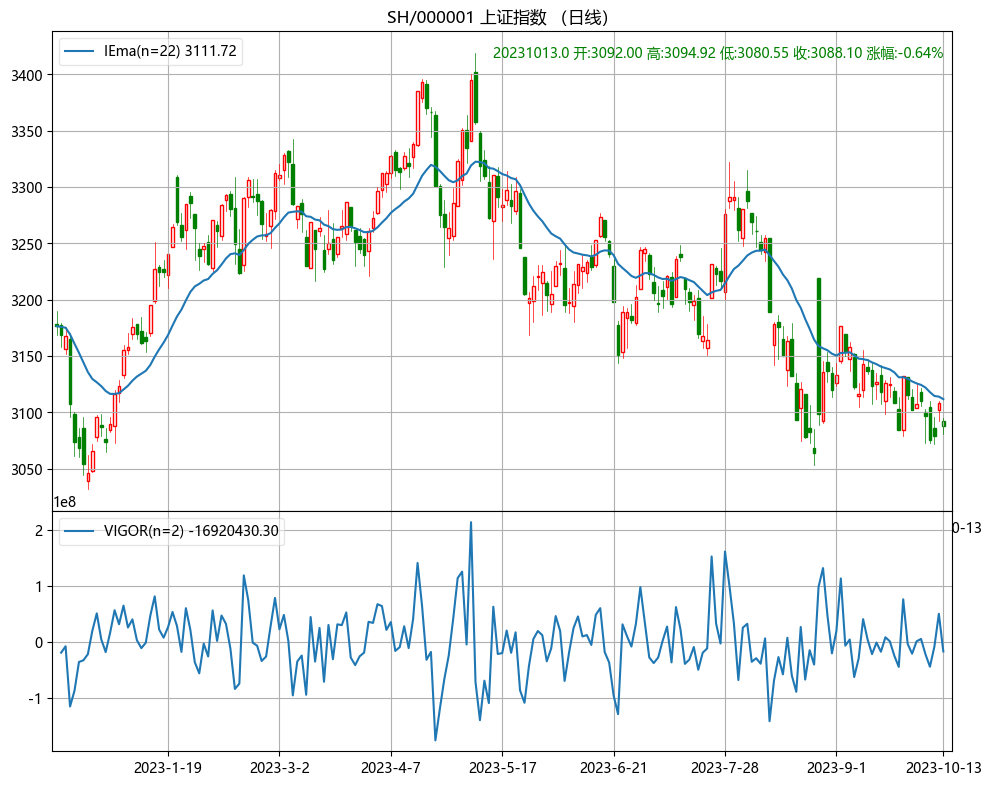

In [4]:
s = sm['sh000001']
k = s.get_kdata(Query(-200))

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

# 绘制MACD

绘制MACD：
- ax_draw_macd
- ax_draw_macd2

D:\workspace\hikyuu\hikyuu\draw\drawplot\matplotlib_draw.py:363: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(py_indicatr, '-', label=label, *args, **kwargs)


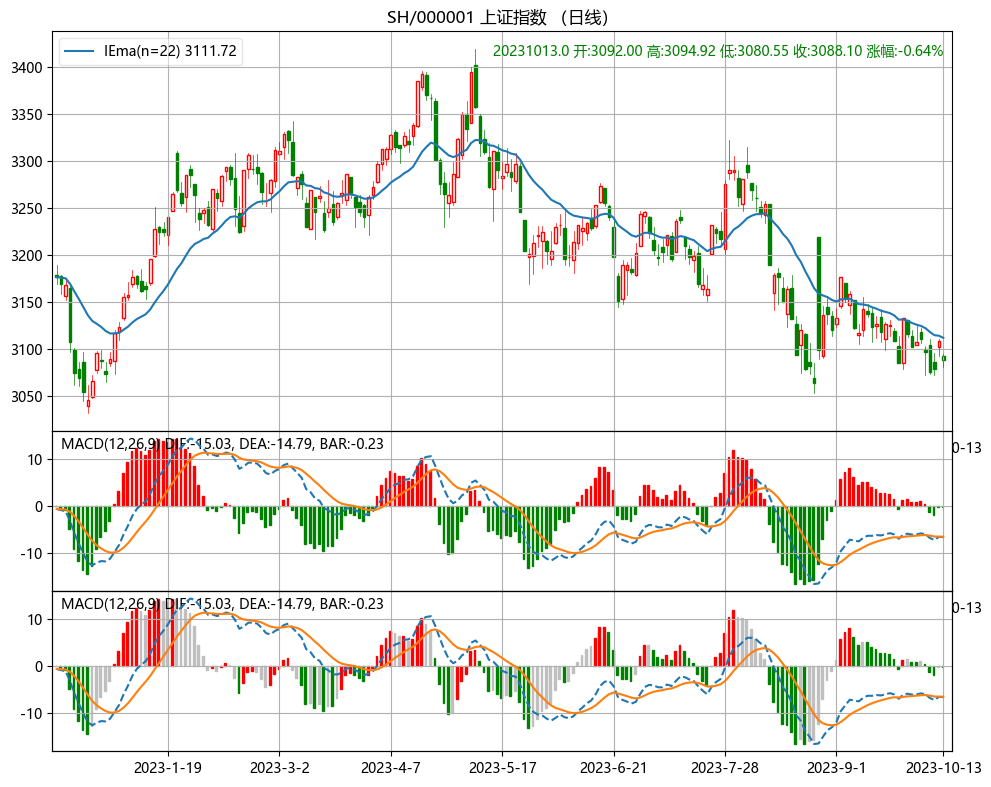

In [5]:
ax1,ax2, ax3 = create_figure(3)

k.plot(axes=ax1)
ma.plot(axes=ax1, legend_on=True)

ax_draw_macd(axes=ax2, kdata=k)
ax_draw_macd2(axes=ax3, ref=ma, kdata=k)

# 内建的三个较复杂示例

- el.draw 绘制亚历山大.艾尔德交易系统图形
- kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- vl.draw 绘制普通K线图 + 成交量（成交金额）
- vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD


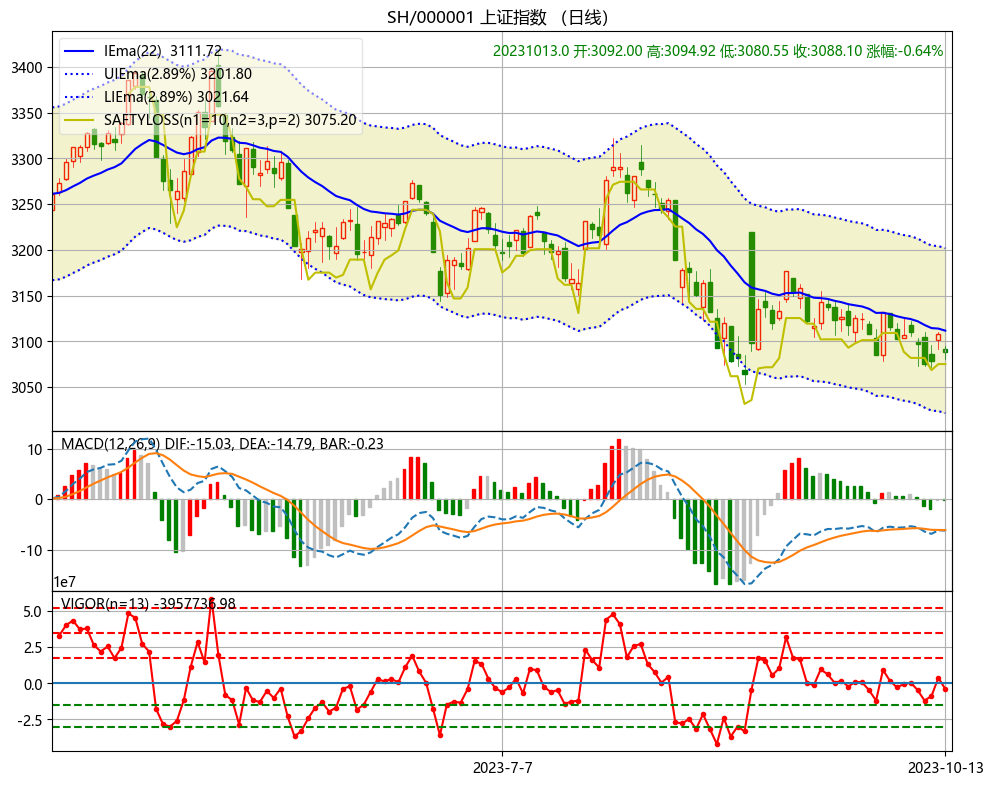

In [6]:
el.draw(s)

2023-10-14 02:23:43,032 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [matplotlib.legend::_parse_legend_args]


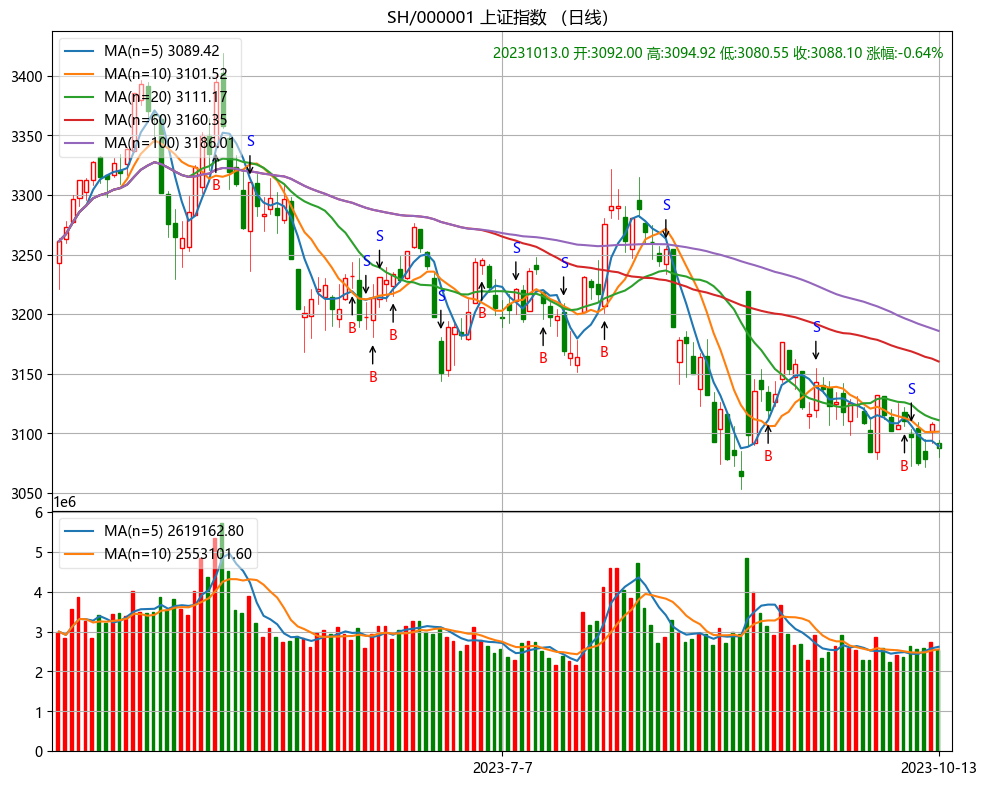

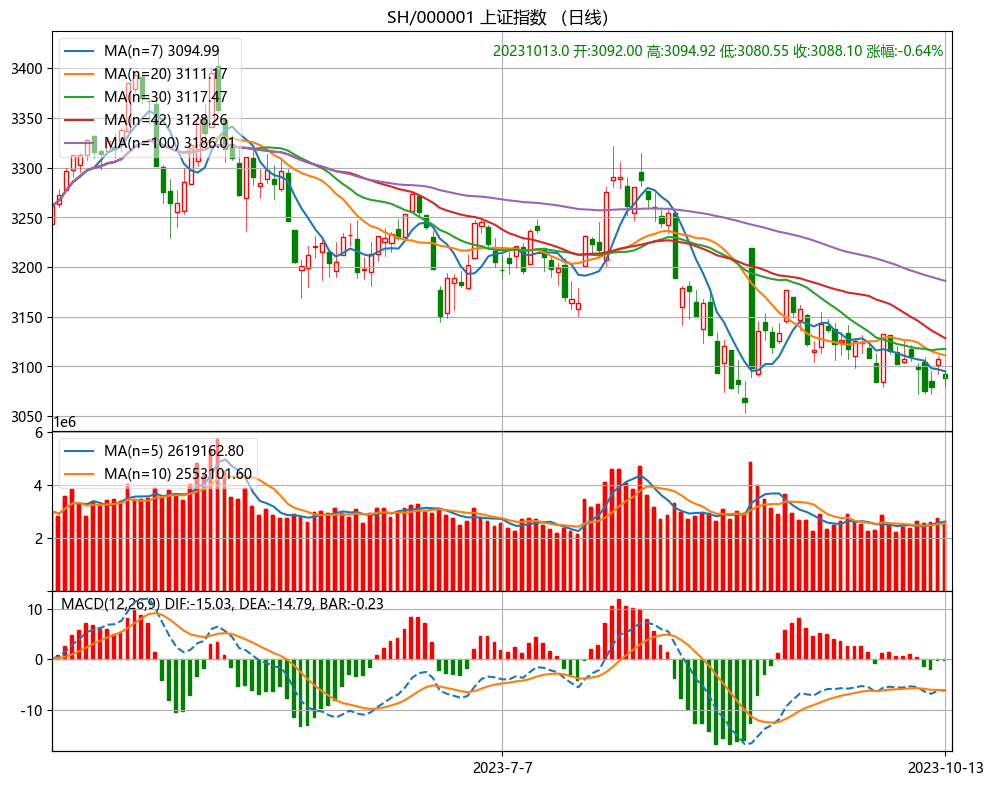

In [7]:
vl.draw(s)
vl.draw2(s)

In [ ]:
kf.draw(s)
kf.draw2(blocka)